In [1]:
import set_math

success import scipy
success import pandas
success import numpy
success import sympy
success import matplotlib.pyplot
Hangul OK in your MAC !!!


In [2]:
%matplotlib inline

In [3]:
sample = pd.read_csv('../data/01. final_sample', index_col = 0)
sample.head()

,year,month,day,store_nbr,station_nbr,codesum,units
0,2012,1,1,1,1,RA FZFG BR,32
1,2012,1,1,2,14,,406
2,2012,1,1,3,7,,326
3,2012,1,1,4,9,UP,82
4,2012,1,1,5,12,FG+ FG BR,41


In [4]:
sample['codesum'][1]

' '

# 컬럼 추가

- codesum 데이터 빈 데이터 normal로 수정
- 계절 컬럼 추가
- codesum에 따른 normal과 unnormal로 분류

In [5]:
def ch_codesum(codesum):
    if codesum == ' ':
        return "Normal"
    else:
        return codesum

In [6]:
# 기상데이터 
sample['codesum'] = sample['codesum'].apply(ch_codesum)

In [7]:
sample.head()

,year,month,day,store_nbr,station_nbr,codesum,units
0,2012,1,1,1,1,RA FZFG BR,32
1,2012,1,1,2,14,Normal,406
2,2012,1,1,3,7,Normal,326
3,2012,1,1,4,9,UP,82
4,2012,1,1,5,12,FG+ FG BR,41


In [8]:
def make_season(month):
    if month >= 3 and month <= 5:
        return "spring"
    elif month >= 6 and month <= 8:
        return "summer"
    elif month >= 9 and month <= 11:
        return "fall"
    else:
        return "winter"

In [9]:
sample['season'] = sample['month'].apply(make_season)
sample.tail()

,year,month,day,store_nbr,station_nbr,codesum,units,season
41595,2014,10,31,41,12,BR,52,fall
41596,2014,10,31,42,14,Normal,64,fall
41597,2014,10,31,43,11,Normal,48,fall
41598,2014,10,31,44,12,BR,87,fall
41599,2014,10,31,45,16,Normal,11,fall


In [10]:
def compare_codesum(codesum):
    if codesum == "Normal":
        return codesum
    else:
        return "Unnormal"

In [11]:
sample["isnormal"] = sample['codesum'].apply(compare_codesum)

In [12]:
sample.tail()

,year,month,day,store_nbr,station_nbr,codesum,units,season,isnormal
41595,2014,10,31,41,12,BR,52,fall,Unnormal
41596,2014,10,31,42,14,Normal,64,fall,Normal
41597,2014,10,31,43,11,Normal,48,fall,Normal
41598,2014,10,31,44,12,BR,87,fall,Unnormal
41599,2014,10,31,45,16,Normal,11,fall,Normal


# boxplot (전체 데이터)

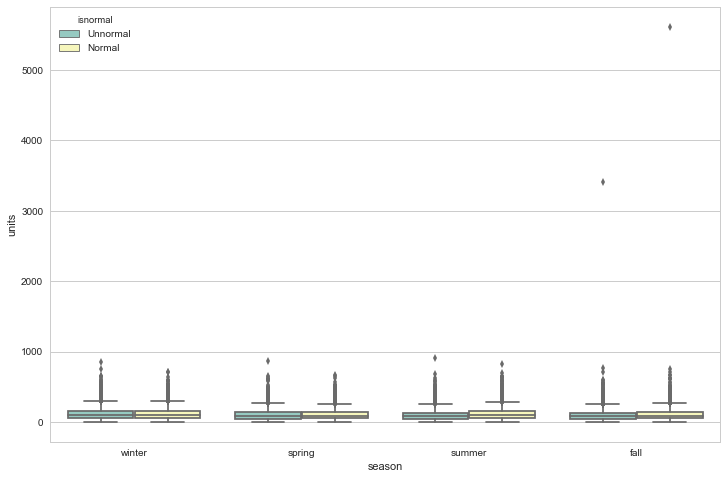

In [13]:
sns.set_style('whitegrid')
plt.figure(figsize = (12,8))
sns.boxplot(x = 'season', y = 'units', data = sample,hue = 'isnormal', palette = "Set3")
plt.show()

# outlier 제거

In [14]:
sample[sample['units'] > 3000]

,year,month,day,store_nbr,station_nbr,codesum,units,season,isnormal
14239,2012,11,15,37,13,Normal,5613,fall,Normal
28739,2013,11,21,37,13,SN BR,3405,fall,Unnormal


In [15]:
sample.drop(14239, inplace = True)

In [16]:
sample[sample['units'] > 3000]

,year,month,day,store_nbr,station_nbr,codesum,units,season,isnormal
28739,2013,11,21,37,13,SN BR,3405,fall,Unnormal


In [17]:
sample.drop(28739, inplace = True)

In [18]:
sample[sample['units'] > 3000]

,year,month,day,store_nbr,station_nbr,codesum,units,season,isnormal


# outlier 제거 후 다시 boxplot ( 전체 데이터 )

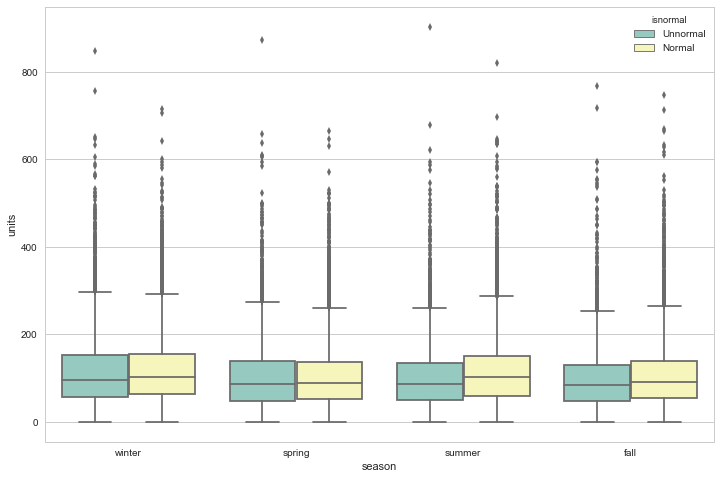

In [19]:
sns.set_style('whitegrid')
plt.figure(figsize = (12,8))
sns.boxplot(x = 'season', y = 'units', data = sample,hue = 'isnormal', palette = "Set3")
plt.show()

# station 1, 5, 10, 15, 20에 대한 개별 boxplot

### station1

In [20]:
station_1 = sample[sample['station_nbr'].isin([1])].reset_index(drop = True)
station_1.tail()

,year,month,day,store_nbr,station_nbr,codesum,units,season,isnormal
924,2014,10,27,1,1,Normal,23,fall,Normal
925,2014,10,28,1,1,BR,23,fall,Unnormal
926,2014,10,29,1,1,RA FG+ FG BR,13,fall,Unnormal
927,2014,10,30,1,1,Normal,29,fall,Normal
928,2014,10,31,1,1,Normal,36,fall,Normal


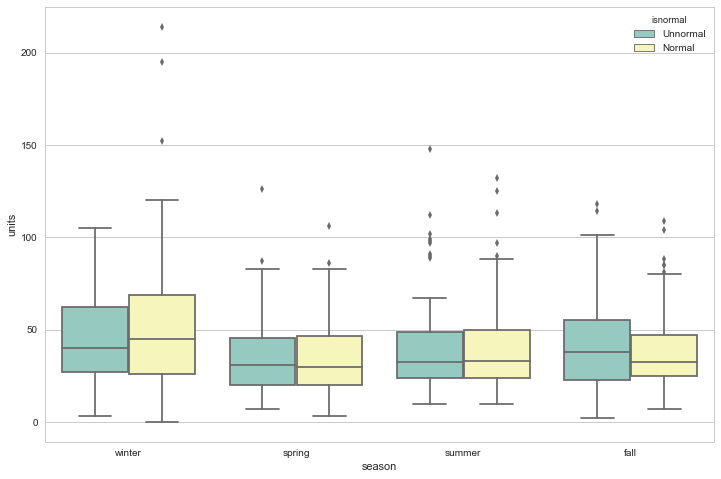

In [21]:
sns.set_style('whitegrid')
plt.figure(figsize = (12,8))
sns.boxplot(x = 'season', y = 'units', data = station_1,hue = 'isnormal', palette = "Set3")
plt.show()

### station 5

In [22]:
station_5 = sample[sample['station_nbr'].isin([5])].reset_index(drop = True)
station_5.tail()

,year,month,day,store_nbr,station_nbr,codesum,units,season,isnormal
846,2014,10,27,35,5,Normal,30,fall,Normal
847,2014,10,28,35,5,Normal,25,fall,Normal
848,2014,10,29,35,5,Normal,34,fall,Normal
849,2014,10,30,35,5,Normal,22,fall,Normal
850,2014,10,31,35,5,Normal,28,fall,Normal


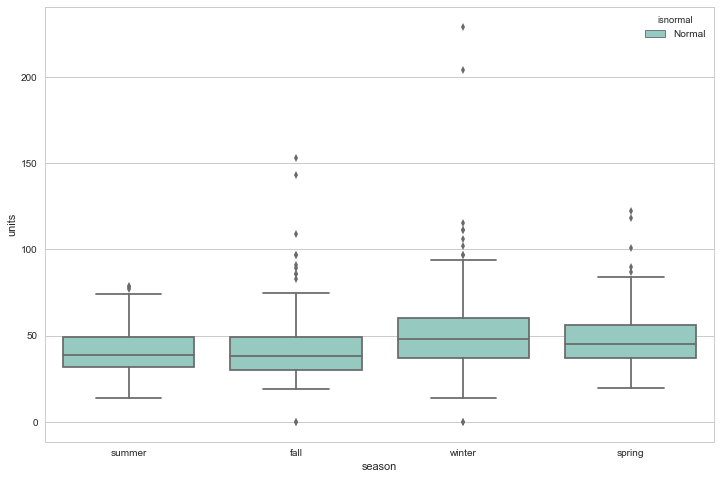

In [23]:
sns.set_style('whitegrid')
plt.figure(figsize = (12,8))
sns.boxplot(x = 'season', y = 'units', data = station_5, hue = 'isnormal', palette = "Set3")
plt.show()

In [24]:
station_5[station_5['isnormal'].isin(["Unnormal"])]

,year,month,day,store_nbr,station_nbr,codesum,units,season,isnormal


### station 10

In [25]:
station_10 = sample[sample['station_nbr'].isin([10])].reset_index(drop = True)
station_10.tail()

,year,month,day,store_nbr,station_nbr,codesum,units,season,isnormal
2689,2014,10,30,22,10,TS RA BR HZ,32,fall,Unnormal
2690,2014,10,30,27,10,TS RA BR HZ,47,fall,Unnormal
2691,2014,10,31,11,10,Normal,41,fall,Normal
2692,2014,10,31,22,10,Normal,18,fall,Normal
2693,2014,10,31,27,10,Normal,12,fall,Normal


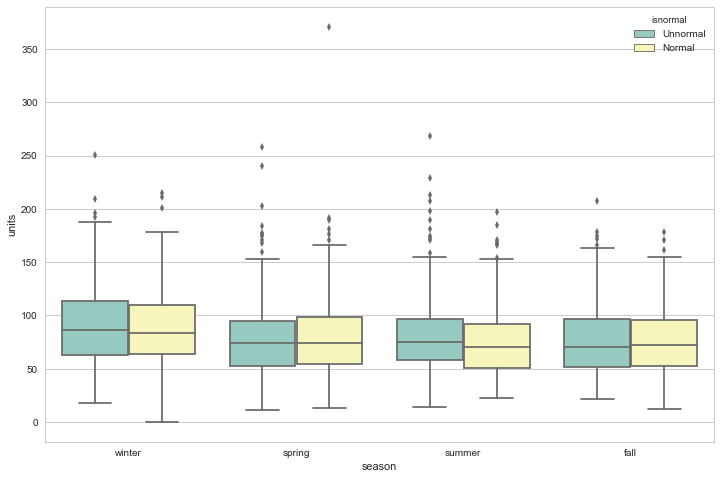

In [26]:
sns.set_style('whitegrid')
plt.figure(figsize = (12,8))
sns.boxplot(x = 'season', y = 'units', data = station_10,hue = 'isnormal', palette = "Set3")
plt.show()

### station 15

In [27]:
station_15 = sample[sample['station_nbr'].isin([15])].reset_index(drop = True)
station_15.tail()

,year,month,day,store_nbr,station_nbr,codesum,units,season,isnormal
873,2014,10,27,19,15,Normal,17,fall,Normal
874,2014,10,28,19,15,RA BR HZ,12,fall,Unnormal
875,2014,10,29,19,15,RA FG+ FG BR,14,fall,Unnormal
876,2014,10,30,19,15,FG BR,14,fall,Unnormal
877,2014,10,31,19,15,Normal,16,fall,Normal


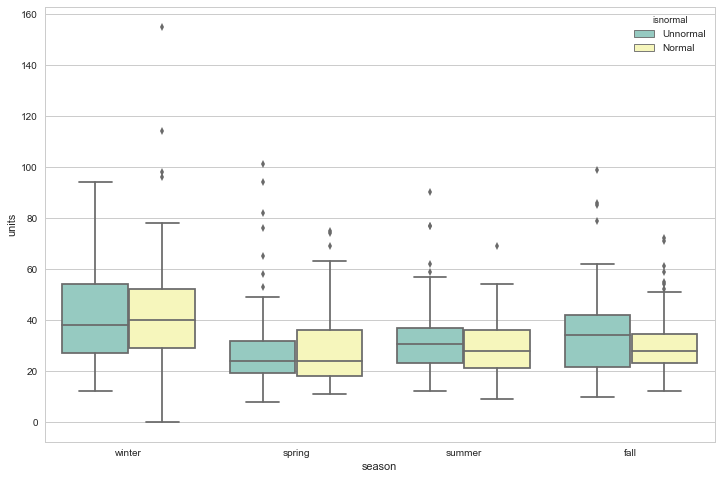

In [28]:
sns.set_style('whitegrid')
plt.figure(figsize = (12,8))
sns.boxplot(x = 'season', y = 'units', data = station_15,hue = 'isnormal', palette = "Set3")
plt.show()

### station 20

In [29]:
station_20 = sample[sample['station_nbr'].isin([20])].reset_index(drop = True)
station_20.tail()

,year,month,day,store_nbr,station_nbr,codesum,units,season,isnormal
934,2014,10,27,17,20,Normal,106,fall,Normal
935,2014,10,28,17,20,Normal,118,fall,Normal
936,2014,10,29,17,20,Normal,72,fall,Normal
937,2014,10,30,17,20,Normal,59,fall,Normal
938,2014,10,31,17,20,Normal,49,fall,Normal


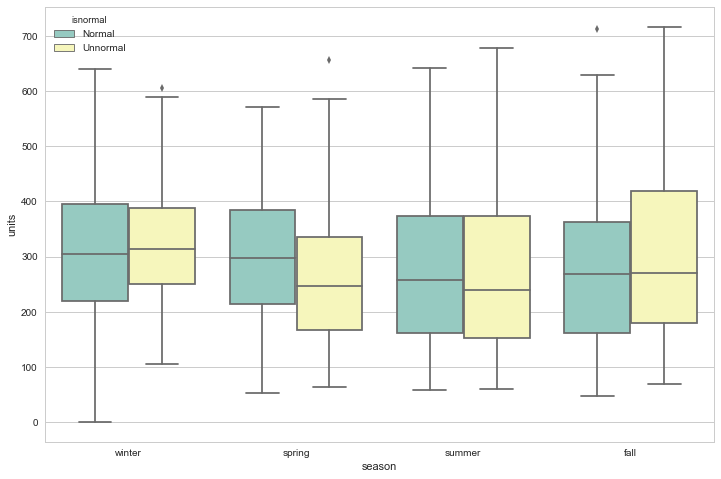

In [30]:
sns.set_style('whitegrid')
plt.figure(figsize = (12,8))
sns.boxplot(x = 'season', y = 'units', data = station_20,hue = 'isnormal', palette = "Set3")
plt.show()

# 전체

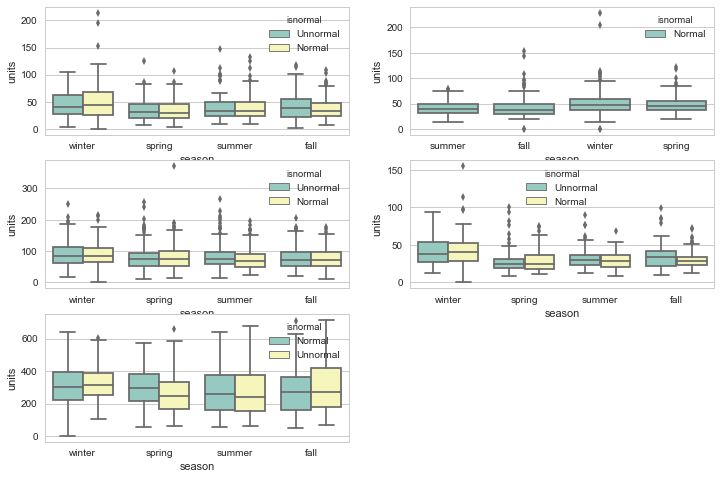

In [31]:
sns.set_style('whitegrid')
plt.figure(figsize = (12,8))

plt.subplot(321)
sns.boxplot(x = 'season', y = 'units', data = station_1,hue = 'isnormal', palette = "Set3")
plt.subplot(322)
sns.boxplot(x = 'season', y = 'units', data = station_5, hue = 'isnormal', palette = "Set3")
plt.subplot(323)
sns.boxplot(x = 'season', y = 'units', data = station_10,hue = 'isnormal', palette = "Set3")
plt.subplot(324)
sns.boxplot(x = 'season', y = 'units', data = station_15,hue = 'isnormal', palette = "Set3")
plt.subplot(325)
sns.boxplot(x = 'season', y = 'units', data = station_20,hue = 'isnormal', palette = "Set3")
plt.show()

In [45]:
sample.to_csv('../data/sample_codesum', sep = ',')